# Random number generation

<hr />
Based on google colab  
and  [the NumPy documentation](https://docs.scipy.org/doc/numpy/reference/random/generator.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<hr>

**Random number generation** (RNG) is the process by which a sequence of psuedo random numbers may be drawn. 

1. They are drawn from a probability distribution. The most common one is the uniform distribution on the domain $0 \le x < 1$, i.e., random numbers between zero and one. ("Completely random" does not make sense because of the infinite magnitude of numbers.) 
2. The random sequence depends on an input **seed** and are then generated by a deterministic algorithm from that seed.



## Uniform random numbers

 `np.random` module.
 To generate random numbers from a Uniform distribution.

In [ ]:
np.random.uniform(low=0, high=1, size=10)

The function `uniform()` in the `np.random` module generates random numbers on the interval \[`low`, `high`) from a Uniform distribution. The `size` parameter is how many random numbers, and is all of Numpy's random number generators. The function returns a NumPy array.



In [ ]:
# Generate random numbers
x = np.random.uniform(low=0, high=1, size=1000)

plt.hist(x)

To simulate an unfair coin

In [ ]:
size = 20
# Generate size random numbers on uniform interval

x = np.random.uniform(low=0, high=1, size=size)

# Make the coin flips (< 0.7 means we have a 70% chance of heads)
heads = x < 0.7

# Show which were heads, and count the number of heads
print(heads)
heads_count= heads.sum() # np.sum(heads)
tails_count = size - heads_count
print(f"\nThere were { heads_count} heads. (and {tails_count} tails)")
labels = ["heads", "Tails"]
plt.pie(np.array([heads_count, tails_count]), labels = labels)

## Choice of generator

Be aware there are two random generators that you can use with python
- [Mersenne Twister Algorithm](https://en.wikipedia.org/wiki/Mersenne_Twister)
- [PCG64 generator](http://www.pcg-random.org) (default)

To select PCG64 (use the default)

In [ ]:
rng = np.random.default_rng()

The syntax is the same as before, except `rng` replaces `np.random`.

In [ ]:
rng.uniform(low=0, high=1, size=20)

## Seeding random number generators

To get the same sequence of random numbers use the same seed

In [ ]:
# Instantiate generator with a seed
rng = np.random.default_rng(seed=3252)

# Draw random numbers
rng.uniform(size=10)

If we reinstantiate with the same seed, we get the same sequence of random numbers.

In [ ]:
# Re-seed the RNG
rng = np.random.default_rng(seed=3252)

# Draw random numbers
rng.uniform(size=10)

The random number sequence is exactly the same.  If we choose a different seed, we get totally different random numbers.

In [ ]:
rng = np.random.default_rng(seed=3253)
rng.uniform(size=10)

If you are writing tests, it is often useful to seed the random number generator to get reproducible results. Otherwise, it is best to use the default seed, based on the date and time, so that you get a new set of random numbers in your applications each time do computations.

## Drawing random numbers out of other distributions

We can also draw random numbers from other probability distributions besides Uniform. For example, say we wanted to draw random samples from a Normal distribution with mean _μ_ and standard deviation _σ_.

In [ ]:
# Set parameters
mu = 10
sigma = 3

# Draw 100000 random samples
x = rng.normal(mu, sigma, size=100000)


plt.hist(x, bins=1000)
plt.show()

It looks Normal, but, again, comparing the resulting ECDF is a better way to look at this. We'll check out the ECDF with 1000 samples so as not to choke the browser with the display. I will also make use of the theoretical CDF for the Normal distribution available from the `scipy.stats` module.


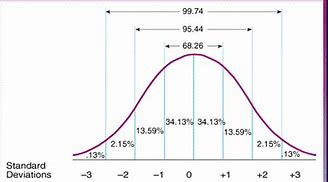


sigma 6

## Selections from discrete distributions

To draw from a Binomial distribution. We can use `rng.binomial()`.

In [ ]:
# Draw how many coin flips land heads in 10 files
rng.binomial(10, 0.5)


There are others discrete distributions 
- Binomial, 
- Geometric, 
- Poisson, etc.,

See [the documentation](https://docs.scipy.org/doc/numpy/reference/random/generator.html).

## Choosing elements from an array

The `rng.choice()` function (the `replace=`parameter allows you to specify if the same entry can be draw twice.
This make this better than just selecting a random int to draw

In [ ]:
rng = np.random.default_rng(seed=126969234)
rng.integers(0, 51, size=20)

Sample 17 was selected twice and sample 26 was selected thrice. This is not unexpected. We can use `rng.choice()` instead.

In [ ]:
rng.choice(np.arange(51), size=20, replace=False)

Now, because we chose `replace=False`, we do not get any repeats.

### Generating random sequences

Because it works with selecting characters as well as numbers, we can use the `rng.choice()` function to generate random DNA sequences.

In [ ]:
"".join(rng.choice(list("ATGC"), replace=True, size=70))

## Shuffling an array

Similarly, the `rng.permutation()` function is useful. It takes the entries in an array and shuffles them! Let's shuffle a deck of cards.

In [ ]:
rng.permutation(np.arange(53))

### Here endeth the notebook